In [1]:
%matplotlib notebook
import seaborn as sns
import pandas as pd
import subject_DM
import helpers
import numpy as np
import collections

Loaded entropies from file (S=15000, entropy_bins=50)!
Loaded dot-level measures from file (S=2000, Smin=20)!


# Checking correlation between possible regressors

<IPython.core.display.Javascript object>


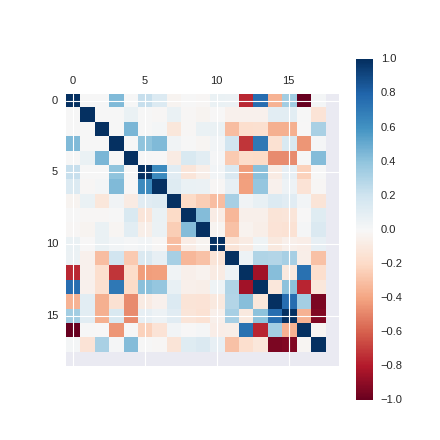

0                      dot_x
1                      dot_y
2            support_correct
3              correct_ideal
4     support_previous_ideal
5                    correct
6                   response
7                         RT
8                 is_correct
9           is_correct_ideal
10                trial_time
11                   entropy
12              logpost_left
13             logpost_right
14               loglik_left
15              loglik_right
16           m_evidence_left
17                  surprise
18                 intercept
dtype: object

In [2]:
sub = 2
DM = subject_DM.get_ithdot_DM_single_sub(sub, doti=4)
img = sns.plt.matshow(DM.corr(), cmap='RdBu', vmin=-1, vmax=1)
sns.plt.colorbar()
img.figure.set_label('subject %d' % sub)
pd.Series(DM.columns)

<IPython.core.display.Javascript object>


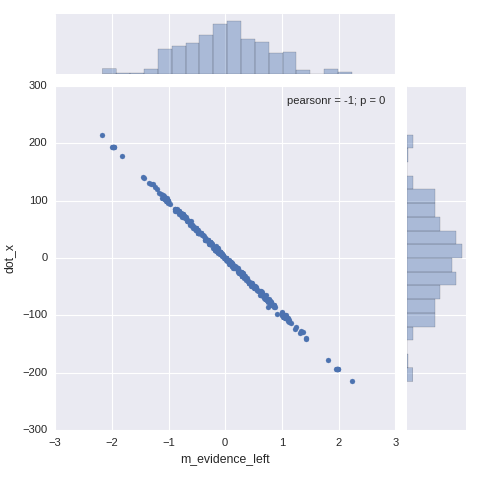

In [3]:
sns.jointplot('m_evidence_left', 'dot_x', data=DM);

<IPython.core.display.Javascript object>


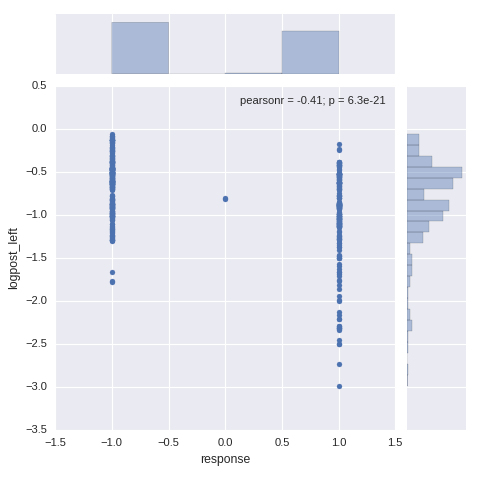

In [4]:
sns.jointplot('response', 'logpost_left', data=DM);

## Selection of regressors with low correlations

<IPython.core.display.Javascript object>


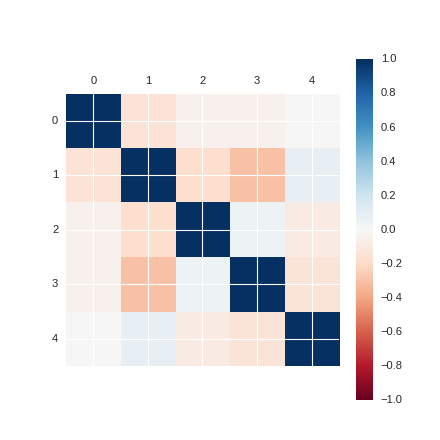

0           dot_y
1        surprise
2    logpost_left
3         entropy
4      trial_time
dtype: object

In [5]:
DM_lowr = DM[['dot_y', 'surprise', 'logpost_left', 'entropy', 'trial_time']]
img = sns.plt.matshow(DM_lowr.corr(), cmap='RdBu', vmin=-1, vmax=1)
sns.plt.colorbar()
img.figure.set_label('subject %d' % sub)
pd.Series(DM_lowr.columns)

### Checking correlation of these regressors across all subjects

In [6]:
doti = 5
DM_all = subject_DM.get_ithdot_DM(doti, 
        ['dot_y', 'surprise', 'logpost_left', 'entropy', 'trial_time'])
corrs = pd.concat([DM_all.loc[sub].corr() for sub in DM_all.index.levels[0]],
                  keys=DM_all.index.levels[0], names=['subject', 'regressor'])
corrs[corrs==1.] = np.nan
corrs.describe()

,dot_y,surprise,logpost_left,entropy,trial_time
count,144.000000,144.000000,144.000000,144.000000,144.000000
mean,0.025222,-0.076758,0.015279,0.043139,0.002547
std,0.066951,0.076366,0.144194,0.156050,0.047058
min,-0.107936,-0.227120,-0.199143,-0.227120,-0.129165
25%,-0.026991,-0.143238,-0.080243,-0.062628,-0.025000
50%,0.006602,-0.052462,-0.000105,0.050147,-0.000504
75%,0.067835,-0.028064,0.054030,0.138306,0.036699
max,0.198754,0.107995,0.625884,0.625884,0.121142


<IPython.core.display.Javascript object>


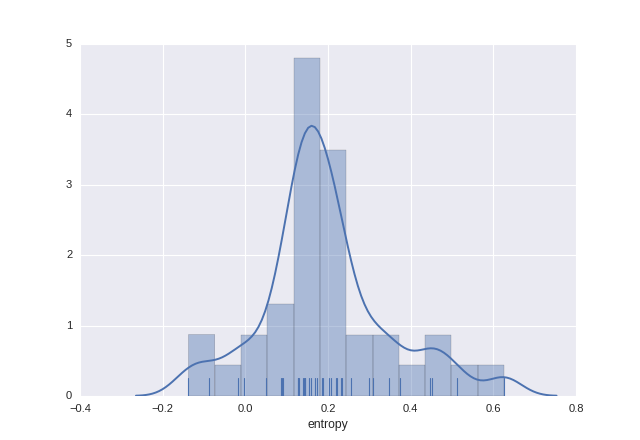

/home/bitzer/programs/anaconda/envs/python3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


In [7]:
sns.plt.figure()
sns.distplot(corrs.xs('logpost_left', level='regressor').entropy, rug=True)